## Drug Discovery -- Mechanism of Action

### Gene Expression

Gene expression is the process by which information from a gene is used to synthesize a functional gene product, i.e. a protein. These proteins ultimately create a person's phenotype, which is the observable traits that are expressed through someone's genotype. With the correct molecular formulation, genetic transcription pathways can be inhibited or catalyzed by a given medication, and by manipulating these pathways humans are able to alter the chemistry within our bodies and fight cancer or treat hypertension for example.

Recording and cataloging gene expression data is especially important for pharmaceutical development since the goal of any medication is to modulate a transcriptional pathway, and through repetition or trials, trends may be observed to determine its safety or lack thereof within an in vitro and then in-human setting.   

### Cell Viability 

Cell viability is a measurement of the total live, healthy cells within a given sample. Assays are used to quantify factors such as metabolic activity, presence of ATP and cell proliferation, and also the toxicity or markers signifying the death of a cell. When introducing investigational compounds within an in-vitro environment, possessing the ability to quantify the enhancement or inhibition of certain cellular processes becomes extremely important because these metrics are used to scale the effectiveness and/or harmfulness of the compound within the human body. Understanding how well a compound is absorbed may be of particular concern to clinical researchers, because a negative downstream effect could be blood toxicity due to compounds that cannot be metabolized, or a positive downstream effect  from proper absorption could be the proliferation of healthy cells vs. harmful cells.  

For example, a PD-L1 checkpoint inhibitor is a class of drugs meant to interupt the binding of PD-L1 to a PD-1 receptor. Cancer cells express the PD-L1 protein and they use it to bind to an immune cell's PD-1 receptor, thus helping the cancer cells avoid being detected as a foreign/threatening object. So PD-L1 receptors act as an inhibiting force, preventing the binding of the molecules and leaving the cancer cells open to immune system eradication.  

In [235]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

from sklearn.pipeline import Pipeline

In [236]:
test_features = pd.read_csv('test_features.csv')
train_features = pd.read_csv('train_features.csv')
tt_nonscored = pd.read_csv('train_targets_nonscored.csv')
tt_scored = pd.read_csv('train_targets_scored.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [237]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [238]:
test_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [239]:
tt_scored.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
# Find total unique datatypes

train_features.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [241]:
dfs = [test_features, train_features]

In [242]:
# convert strings and objects to integer values

def cleaner(df):
    df['cp_type'] = df['cp_type'].map({'ctl_vehicle': 0, 'trt_cp': 1})
    df['cp_time'] = df['cp_time'].map({24: 1, 48: 2, 72: 3})
    df['cp_dose'] = df['cp_dose'].map({'D1': 0 , 'D2': 1})
    return df


for df in dfs:
    cleaner(df)

In [243]:
# find indicies of cp_type of 'trt_cp' to limit train & test feature dataframes 
# match train_freatures to scored features to maintain data integrity

keep_idx_test = test_features[test_features.cp_type != 0].index
keep_idx_train = train_features[train_features.cp_type != 0].index


train_features = train_features.loc[keep_idx_train]
tt_scored = tt_scored.loc[keep_idx_train]

In [244]:
pipe = Pipeline([('ss', StandardScaler()), ('sgd', SGDClassifier(loss='log', max_iter=25000, n_jobs=-1, random_state=34, shuffle=True))])

clf = OneVsRestClassifier(pipe, n_jobs=-1)

In [245]:

X_train, X_test, y_train, y_test = train_test_split(train_features, tt_scored, test_size=.25, random_state=20)


In [246]:
s_sigs = pd.DataFrame()
s_sigs['sig_id'] = X_test['sig_id']
s_sigs

,sig_id
8546,id_5bfd8b079
20367,id_dab475e01
12759,id_896d4f2ab
11928,id_807933fab
15613,id_a7fae6323
...,...
22809,id_f4d73321b
7221,id_4d945ebe1
18244,id_c3cad17f4
17860,id_bfd74dc37


In [247]:
full_dfs = [train_features, test_features, X_train, X_test, y_train, y_test]

def col_drop(df):
    df = df.drop(columns=['sig_id'], axis=1, inplace=True)
    return df

for df in full_dfs:
    col_drop(df)
    
tt_scored = tt_scored.drop('sig_id', 1)

/Users/garrettwankel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [248]:
X_train.head()

# Key:
# ['cp_type'] = whether data is from control or active groups
#     0 = control
#     1 = active
# ['cp_time'] = treatment duration time
#     1 = 24hrs
#     2 = 48hrs
#     3 = 72hrs
# ['cp_dose'] = treatment strength
#     0 = low
#     1 = high

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
18664,1,1,1,-0.0735,0.3733,1.2770,0.6550,-0.1764,-0.2977,-0.2165,...,0.8167,-0.0833,-0.1682,-0.0377,0.1315,0.0052,-0.1533,-1.0110,-0.0890,0.7696
8600,1,2,1,0.0083,0.4435,-0.0573,0.1381,-0.4604,-1.1820,0.4600,...,0.0500,0.0642,-0.7350,0.6670,-1.2290,-0.5958,0.0106,-0.2453,0.1824,0.6426
13096,1,3,1,-0.0823,-0.1980,1.0050,0.2757,0.0971,-0.9277,-0.1214,...,0.0064,0.6003,-0.3662,-0.3997,0.2637,0.9734,-0.0889,0.1995,1.4540,-0.3916
13545,1,1,0,0.3449,0.5996,1.2810,0.0422,0.3466,-0.4534,0.0515,...,-0.0288,-0.2130,0.2311,0.3654,0.4857,-0.7129,-0.0273,-0.2393,-0.3285,0.4582
8856,1,1,1,0.1213,0.5549,0.6582,0.2765,1.5400,-0.5185,0.1406,...,0.3276,0.9350,0.1076,-1.0770,-0.2597,-0.1800,-0.6838,0.1938,0.4979,0.1901


In [249]:
X_test.head()

# Key:
# ['cp_type'] = whether data is from control or active groups
#     0 = control
#     1 = active
# ['cp_time'] = treatment duration time
#     1 = 24hrs
#     2 = 48hrs
#     3 = 72hrs
# ['cp_dose'] = treatment strength
#     0 = low
#     1 = high 

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
8546,1,2,0,-0.4282,0.1562,-0.3904,0.3119,-0.6535,-0.3958,-0.2709,...,-1.9900,0.7424,-5.9190,-0.4328,-3.0640,-0.9153,-0.1274,-1.0760,-0.9114,-0.1077
20367,1,3,1,-0.5026,-1.6500,0.7571,-1.9170,-3.1020,0.4261,-2.0740,...,-5.1770,-8.3320,-3.8980,-5.4370,-7.3660,-4.8450,-6.0770,-4.3760,-4.5950,-4.2700
12759,1,2,0,0.0606,-0.2622,-0.3526,0.0148,-0.1116,-0.0960,0.3614,...,0.2637,-1.5270,0.2813,-0.2619,-0.0631,-0.2409,-0.1968,0.0988,-0.4827,-0.9247
11928,1,3,0,0.4284,0.2543,0.5108,-0.4880,0.4187,-0.8920,0.9325,...,0.6248,0.3146,0.1212,0.5807,0.5878,0.1285,0.5445,0.1760,0.0358,0.2980
15613,1,2,0,-0.7766,0.9036,-0.9348,-0.9568,-0.4039,-1.7850,-0.6355,...,-0.2938,-0.6273,0.2365,-0.2955,-0.4189,-0.8607,-0.0817,-0.0431,0.0254,-0.4186


In [250]:
# create column list for both DataFrames, as well as separate DataFrames for Gene Expression columns
# and Cell Viability columns

g_cols = [col for col in train_features if 'g-' in col]
c_cols = [col for col in train_features if 'c-' in col]

gene_df = train_features.loc[:, 'g-0':'g-771']
cell_df = train_features.loc[:, 'c-0':]
    

The column with the most identical expression values is:  g-104 with 4420 identical expression values, at 0.0 level of interactivity.
The column with the least identical expression values is:  g-175 with 9 identical expression values, at 0.0 level of interactivity.


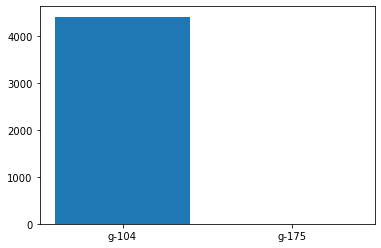

The column with the most identical expression values is:  c-93 with 465 identical expression values, at -10.0 level of interactivity.
The column with the least identical expression values is:  c-50 with 20 identical expression values, at -10.0 level of interactivity.


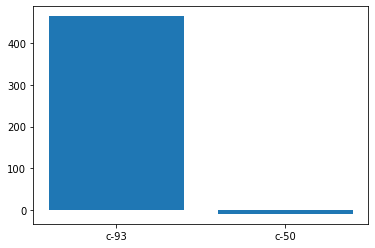

In [251]:
# Create Function to iterate through dataframes and extract values from unique columns

exp_dfs = [gene_df, cell_df]

def finder(df):
    most_in_common = df.loc[:].nunique().idxmin()
    least_in_common = df.loc[:].nunique().idxmax() 
    
    most_count = np.unique(df.loc[:, most_in_common], return_counts=True)
    least_count = np.unique(df.loc[:, least_in_common], return_counts=True)
    most_count = most_count[1].max()
    least_count = least_count[1].max()
    
    subset_df = df.loc[:, most_in_common].to_frame()
    most_common_int = subset_df.pivot_table(index=[most_in_common], aggfunc='size').idxmax()
    subset_df2 = df.loc[:, least_in_common].to_frame()
    most_variable_int = subset_df2.pivot_table(index=[least_in_common], aggfunc='size').idxmax()
    return most_in_common, least_in_common, most_count, least_count, most_common_int, most_variable_int


for df in exp_dfs:
    values = finder(df)
    val1 = [values[0], values[1]]
    val2 = [values[2], values[4]]
    print('The column with the most identical expression values is: ', values[0], 'with', values[2], 'identical expression values, at', values[4], 'level of interactivity.')
    print('The column with the least identical expression values is: ', values[1], 'with', values[3], 'identical expression values, at', values[5], 'level of interactivity.')
    plt.bar(val1, val2)
    plt.show()
    

In [252]:
# very little variance among total cell expression unique values versus gene expression unique values

def variance(df):
    
    cols = df.nunique()
    x = cols.sort_values()

    return x[-1], x[-1] - x[0]

for df in exp_dfs:
    difference = variance(df)
    print(difference)

(14317, 11318)
(14293, 653)


In [253]:
def val_scatter(gene_df):
    
    all_unique_val = gene_df.loc[:].nunique()
    return all_unique_val

    plt.bar(g_cols, val_scatter(gene_df))
    plt.tight_layout()
    plt.show()

val_scatter(gene_df)

g-0      13705
g-1      13283
g-2      13508
g-3      12239
g-4      13370
         ...  
g-767    13530
g-768    11087
g-769    13406
g-770    13696
g-771    13812
Length: 772, dtype: int64

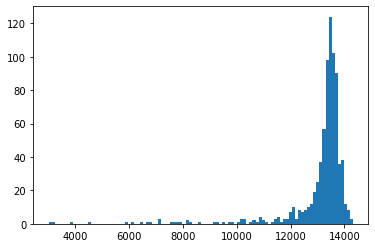

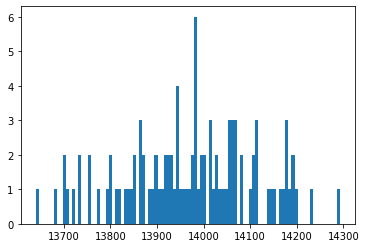

In [254]:
def variation_plotter(df):

    cols = df.loc[:].nunique()

    x = cols.sort_values()
    x = dict(x) 
    unique_vals = x.values()

    plt.hist(unique_vals, bins=100)
    plt.show()
    
for df in exp_dfs:
    variation_plotter(df)

In [255]:
g = gene_df.loc[:].nunique()

g.idxmin(),g.idxmax()


('g-104', 'g-175')

In [256]:
# Top 3 identical expression values with their interactivity among gene/cell with highest identical expression values

# 'g-104' & 'c-93'

def top_three(df):
    most_in_common = df.loc[:].nunique().idxmin()
    most_count = np.unique(df.loc[:, most_in_common], return_counts=True)
    mc = most_count[1]
    mc.sort()
    return mc[-3:]
    
    
for df in exp_dfs:
    print(top_three(df))

[ 570  571 4420]
[ 10  10 465]


In [257]:
clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                              ('sgd',
                                               SGDClassifier(loss='log',
                                                             max_iter=25000,
                                                             n_jobs=-1,
                                                             random_state=34))]),
                    n_jobs=-1)

In [258]:
clf.multilabel_

True

In [259]:
preds = clf.predict(X_test)

In [260]:
preds.shape

(5487, 206)

In [261]:
log_score = log_loss(np.ravel(y_test), np.ravel(preds))
acc_score = accuracy_score(y_test, preds, normalize=True)

In [262]:
log_score, acc_score

(0.13622199544817404, 0.40386367778385274)

In [263]:
x = tt_scored.sum(axis=0).sort_values(ascending=False).reset_index()
x.columns = ['drug_class', 'total_count_present']

px.bar(x, x='total_count_present', y='drug_class', height=1200, width=1000, orientation='h')

In [264]:
x = tt_scored.sum(axis=0).sort_values(ascending=False).reset_index()

In [265]:
tt_nonscored = tt_nonscored.drop('sig_id', axis=1).sum(axis=0).sort_values(ascending=False).reset_index()

In [266]:
tt_nonscored

,index,0
0,ace_inhibitor,91
1,purinergic_receptor_antagonist,78
2,map_kinase_inhibitor,74
3,sterol_demethylase_inhibitor,72
4,bone_resorption_inhibitor,67
...,...,...
397,collagenase_inhibitor,0
398,collapsin_response_mediator_protein_stimulant,0
399,coloring_agent,0
400,complement_antagonist,0


In [267]:
# tzs = [.2, .225, .25, .275]
# mod_log_loss = []
# rss = []
# lls = []
# def model_funnel(X, y, tz, mod):
    
#     rs = np.random.randint(100)
#     rss.append(rs)
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tz, random_state=rs)
#     mod.fit(X_train, y_train)
    
#     pred = mod.predict(X_test)
#     mod_log_loss.append(pred)
    
#     ll = log_loss(np.ravel(y_test), np.ravel(pred))
#     lls.append(ll)
    
    
    

# for tz in tzs:
#     values = model_funnel(train_features, tt_scored, tz, clf)

In [268]:
# lls

In [269]:
s_sigs

,sig_id
8546,id_5bfd8b079
20367,id_dab475e01
12759,id_896d4f2ab
11928,id_807933fab
15613,id_a7fae6323
...,...
22809,id_f4d73321b
7221,id_4d945ebe1
18244,id_c3cad17f4
17860,id_bfd74dc37


In [270]:

sample_submission = pd.DataFrame(preds, columns=tt_scored.columns, index=s_sigs['sig_id'])

sample_submission.to_csv('submission.csv')

In [271]:
ss = pd.read_csv('submission.csv')

In [272]:
ss.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_5bfd8b079,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_dab475e01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_896d4f2ab,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_807933fab,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_a7fae6323,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
